In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing the relevant libraries
import IPython.display
import json
import pandas as pd
import seaborn as sns
import squarify
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import numpy as np
from matplotlib import pyplot as plt

# D3 modules
from IPython.core.display import display, HTML, Javascript
from string import Template

**Data loading and inspection checks**

In [ ]:
items = pd.read_csv("/content/drive/MyDrive/D3.js Visualization/EDA/items.csv")
holiday_events = pd.read_csv("/content/drive/MyDrive/D3.js Visualization/EDA/holidays_events.csv")
stores = pd.read_csv("/content/drive/MyDrive/D3.js Visualization/EDA/stores.csv")
oil = pd.read_csv("/content/drive/MyDrive/D3.js Visualization/EDA/oil.csv")
transactions = pd.read_csv("/content/drive/MyDrive/D3.js Visualization/EDA/transactions.csv",parse_dates=['date'])
# Read in the full training data just to get prior information and here is the output:
# Output: "125,497,040 rows | 6 columns"
train = pd.read_csv("/content/drive/MyDrive/D3.js Visualization/EDA/train.csv", nrows=6000000, parse_dates=['date'])

In [ ]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [ ]:
print("Nulls in Oil columns: {0} => {1}".format(oil.columns.values,oil.isnull().any().values))
print("="*70)
print("Nulls in holiday_events columns: {0} => {1}".format(holiday_events.columns.values,holiday_events.isnull().any().values))
print("="*70)
print("Nulls in stores columns: {0} => {1}".format(stores.columns.values,stores.isnull().any().values))
print("="*70)
print("Nulls in transactions columns: {0} => {1}".format(transactions.columns.values,transactions.isnull().any().values))

Nulls in Oil columns: ['date' 'dcoilwtico'] => [False  True]
Nulls in holiday_events columns: ['date' 'type' 'locale' 'locale_name' 'description' 'transferred'] => [False False False False False False]
Nulls in stores columns: ['store_nbr' 'city' 'state' 'type' 'cluster'] => [False False False False False]
Nulls in transactions columns: ['date' 'store_nbr' 'transactions'] => [False False False]


**Supplementary Data Exploration**

**Oil data**

In [ ]:
oil.head(3)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97


**Stores data**

In [ ]:
stores.head(3)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8


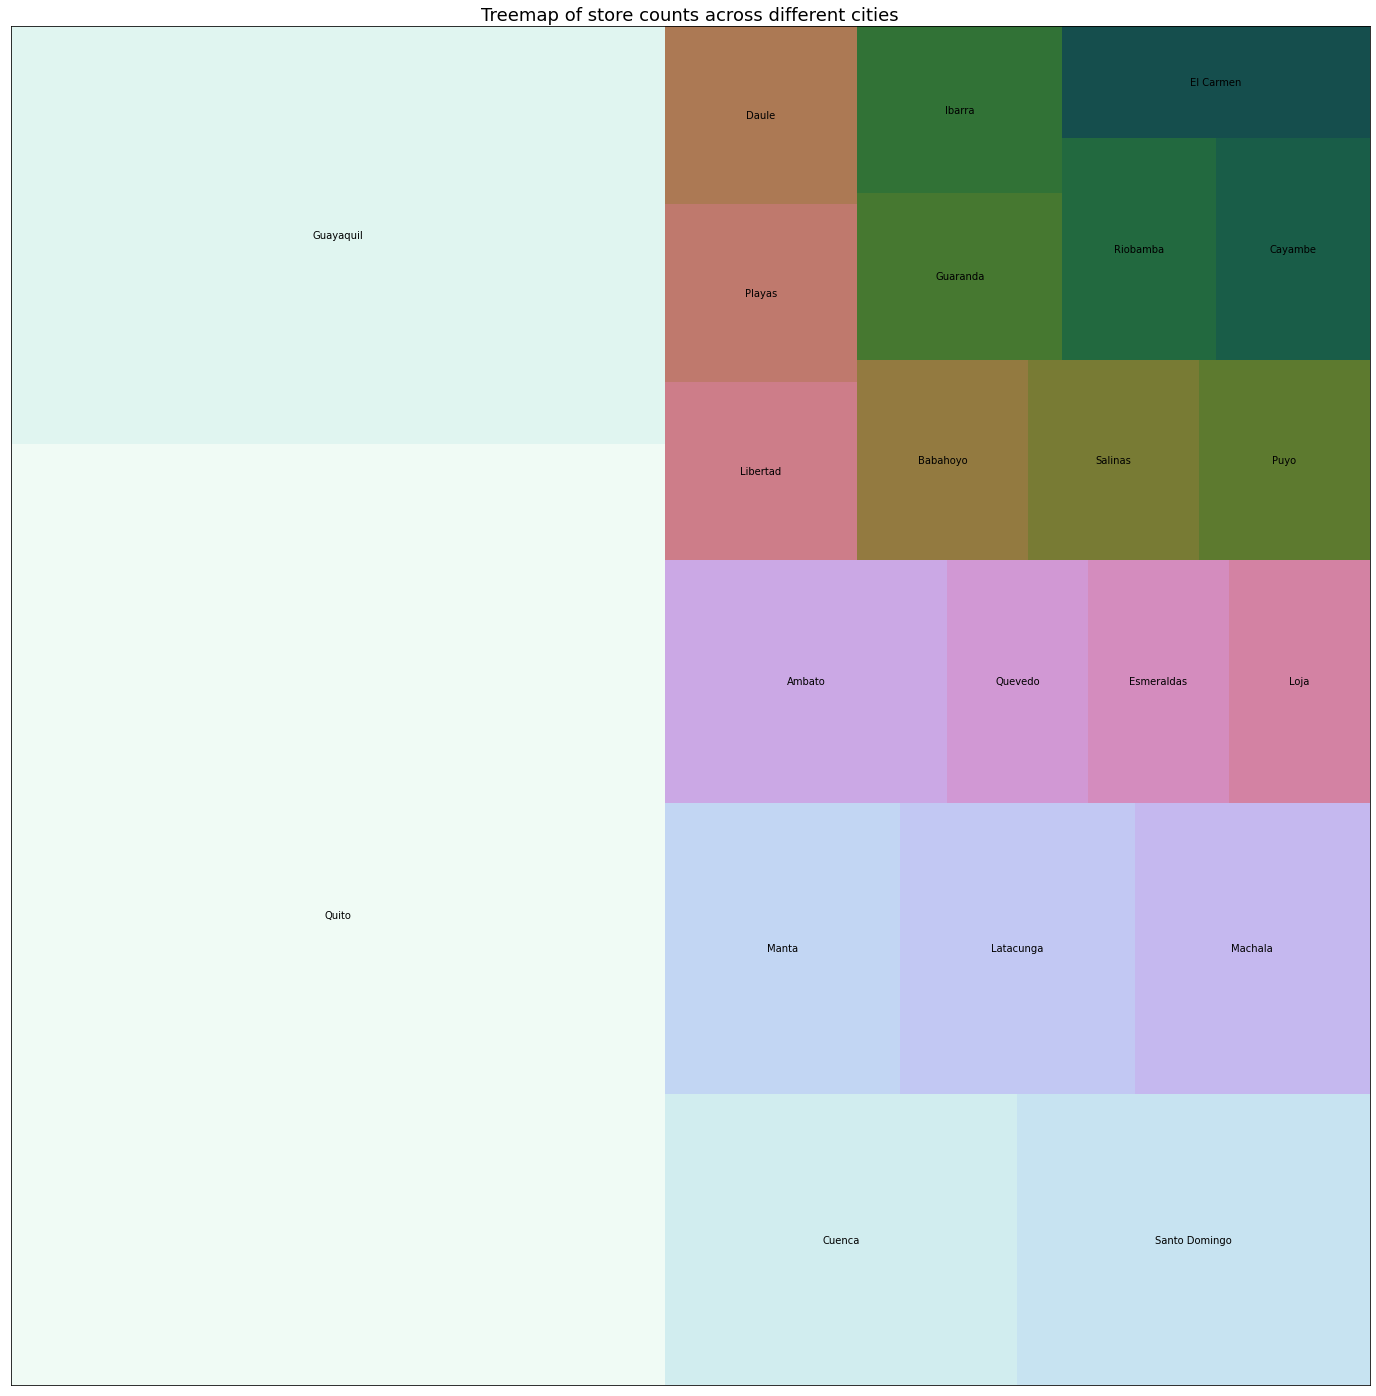

In [ ]:
fig = plt.figure(figsize=(25, 21))
marrimeko=stores.city.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['city'].values,label=marrimeko.index,
              color=sns.color_palette('cubehelix_r', 28), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of store counts across different cities", fontsize=18)
plt.show();

In [ ]:
stores.state.unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [ ]:
# Unhide to see the sorted zip order
neworder = [23, 24, 26, 36, 41, 15, 29, 31, 32, 34, 39, 
            53, 4, 37, 40, 43, 8, 10, 19, 20, 33, 38, 13, 
            21, 2, 6, 7, 3, 22, 25, 27, 28, 30, 35, 42, 44, 
            48, 51, 16, 0, 1, 5, 52, 45, 46, 47, 49, 9, 11, 12, 14, 18, 17, 50]

Text(0.5, 1.0, 'Store numbers and the clusters they are assigned to')

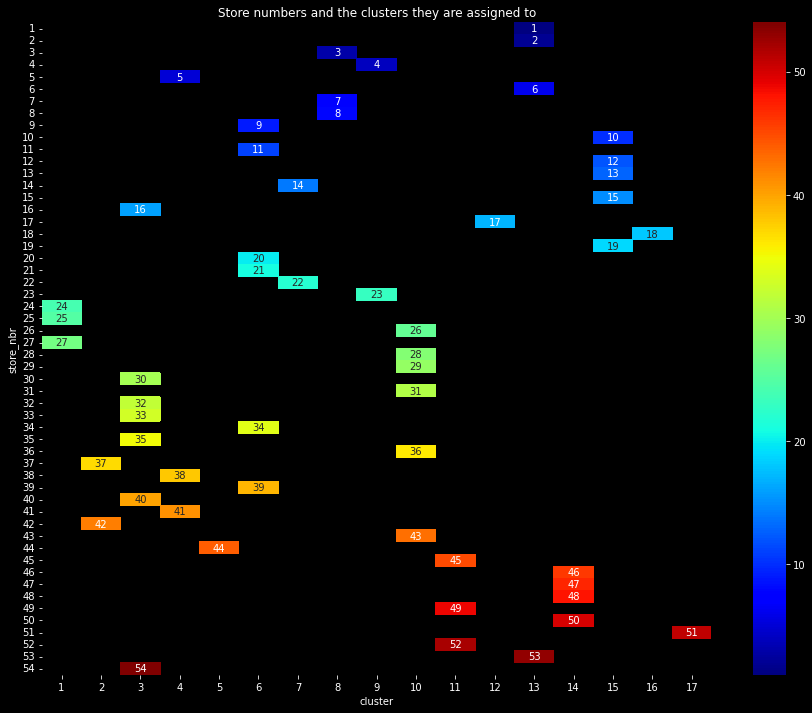

In [ ]:
# Finally plot the seaborn heatmap
plt.style.use('dark_background')
plt.figure(figsize=(15,12))
store_pivot = stores.dropna().pivot("store_nbr","cluster", "store_nbr")
ax = sns.heatmap(store_pivot, cmap='jet', annot=True, linewidths=0, linecolor='white')
plt.title('Store numbers and the clusters they are assigned to')

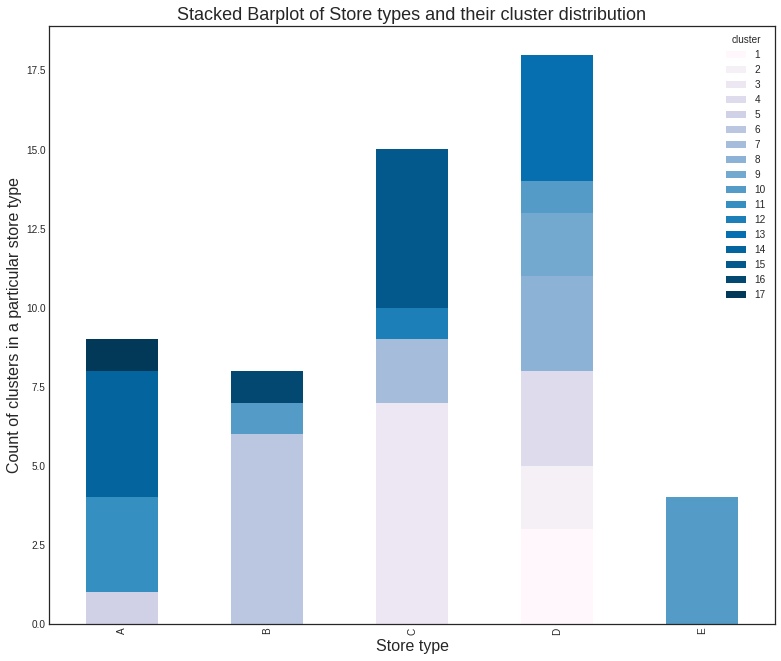

In [ ]:
plt.style.use('seaborn-white')
#plt.style.use('dark_background')
type_cluster = stores.groupby(['type','cluster']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types and their cluster distribution', fontsize=18)
plt.ylabel('Count of clusters in a particular store type', fontsize=16)
plt.xlabel('Store type', fontsize=16)
plt.show()

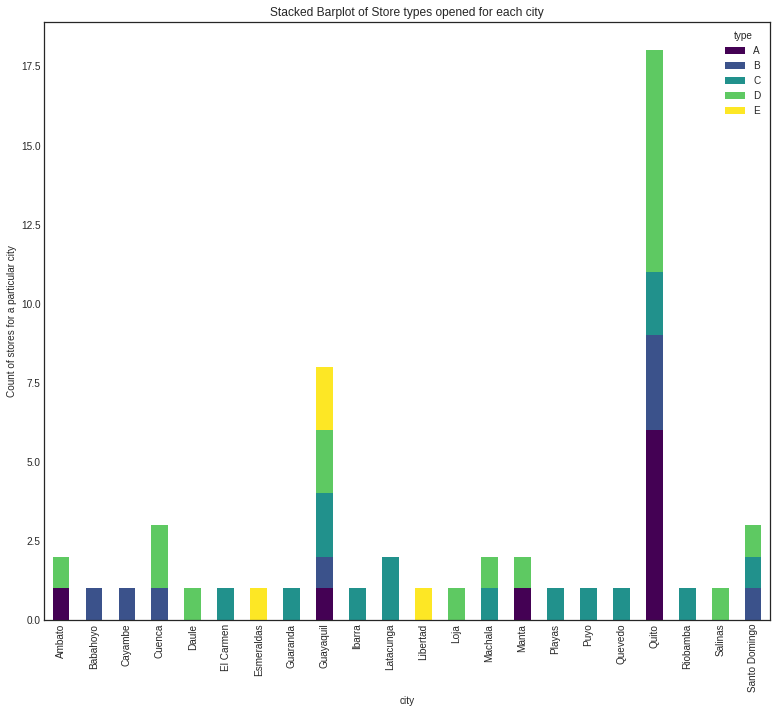

In [ ]:
# plt.style.use('dark_background')
plt.style.use('seaborn-white')
city_cluster = stores.groupby(['city','type']).store_nbr.size()
city_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'viridis', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types opened for each city')
plt.ylabel('Count of stores for a particular city')
plt.show()

**Holiday Events data**

In [ ]:
holiday_events.head(3)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False


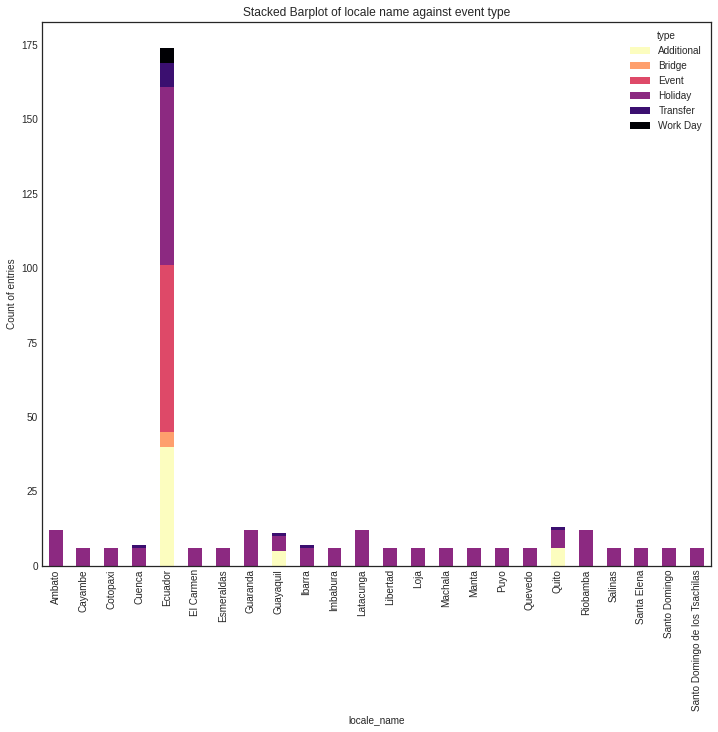

In [ ]:
plt.style.use('seaborn-white')
# plt.style.use('dark_background')
holiday_local_type = holiday_events.groupby(['locale_name', 'type']).size()
holiday_local_type.unstack().plot(kind='bar',stacked=True, colormap= 'magma_r', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('Count of entries')
plt.show()

**D3.js Circular treemapping of Store Type to description**

In [ ]:
# Prepping the json file
holiday_json = {
"name": "flare",
"children": [
{
"name": "Additional",
"children":[
{"name": "Batalla de Pichincha",       "size": 5.0},
{"name": "Cantonizacion de Cayambe",   "size": 6.0},
{"name": "Cantonizacion de El Carmen", "size": 6.0},
{"name": "Cantonizacion de Guaranda",  "size": 6.0},
{"name": "Cantonizacion de Latacunga", "size": 6.0},
{"name": "Cantonizacion de Libertad",  "size": 6.0},
{"name": "Cantonizacion de Quevedo",   "size": 6.0},
{"name": "Cantonizacion de Riobamba",  "size": 6.0},
{"name": "Cantonizacion de Salinas",   "size": 6.0},
{"name": "Cantonizacion del Puyo",     "size": 6.0},
{"name": "Carnaval",                   "size": 0.0},
{"name": "Dia de Difuntos",            "size": 6.0},
{"name": "Dia de la Madre",            "size": 5.0},
{"name": "Dia de la Madre-1",          "size": 5.0},
{"name": "Dia del Trabajo",             "size": 5.0},
{"name": "Fundacion de Guayaquil",    "size": 5.0},
{"name": "Fundacion de Guayaquil-1",  "size": 5.0},
{"name": "Fundacion de Quito",        "size": 6.0},
{"name": "Fundacion de Quito-1",      "size": 6.0},
{"name": "Navidad+1                                      ", "size": 6.0},
{"name": "Navidad-1                                      ", "size": 6.0},
{"name": "Navidad-2                                      ", "size": 6.0},
{"name": "Navidad-3                                      ", "size": 6.0},
{"name": "Navidad-4                                      ", "size": 6.0},
]
},
{
"name":  "Holiday",
"children":[
{"name": "Fundacion de Ambato",       "size": 6.0},
{"name": "Fundacion de Cuenca",       "size": 7.0},
{"name": "Fundacion de Esmeraldas",   "size": 6.0},
{"name": "Fundacion de Ibarra",       "size": 7.0},
{"name": "Fundacion de Loja",         "size": 6.0},
{"name": "Fundacion de Machala",      "size": 6.0},
{"name": "Fundacion de Manta",        "size": 6.0},
{"name": "Fundacion de Riobamba",     "size": 6.0},
{"name": "Fundacion de Santo Domingo", "size": 6.0}
]
},
{
"name": "Event",
"children": [
{"name": "Inauguracion Mundial de futbol Brasil          ", "size": 1.0},
{"name": "Independencia de Ambato                        ", "size": 6.0},
{"name": "Independencia de Cuenca                        ", "size": 6.0},
{"name": "Independencia de Guaranda                      ", "size": 6.0},
{"name": "Independencia de Guayaquil                     ", "size": 6.0},
{"name": "Independencia de Latacunga                     ", "size": 6.0},
{"name": "Mundial de futbol Brasil: Cuartos de Final     ", "size": 2.0},
{"name": "Mundial de futbol Brasil: Ecuador-Francia      ", "size": 1.0},
{"name": "Mundial de futbol Brasil: Ecuador-Honduras     ", "size": 1.0},
{"name": "Mundial de futbol Brasil: Ecuador-Suiza        ", "size": 1.0},
{"name": "Mundial de futbol Brasil: Final                ", "size": 1.0},
{"name": "Mundial de futbol Brasil: Octavos de Final     ", "size": 4.0},
{"name": "Mundial de futbol Brasil: Semifinales          ", "size": 2.0},
{"name": "Mundial de futbol Brasil: Tercer y cuarto lugar", "size": 1.0},
{"name": "Navidad                                        ", "size": 6.0},
{"name": "Primer Grito de Independencia                  ", "size": 6.0},
{"name": "Primer dia del ano                             ", "size": 5.0},
{"name": "Primer dia del ano-1                           ", "size": 5.0},
{"name": "Black Friday",               "size": 3.0},
{"name": "Cyber Monday",               "size": 3.0},
{"name": "Provincializacion Santa Elena                  ", "size": 6.0},
{"name": "Provincializacion de Cotopaxi                  ", "size": 6.0},
{"name": "Provincializacion de Imbabura                  ", "size": 6.0},
{"name": "Provincializacion de Santo Domingo             ", "size": 6.0},
{"name": "Terremoto Manabi                               ", "size": 1.0},
{"name": "Terremoto Manabi+1                             ", "size": 1.0},
{"name": "Terremoto Manabi+10                            ", "size": 1.0},
{"name": "Terremoto Manabi+11                            ", "size": 1.0},
{"name": "Terremoto Manabi+12                            ", "size": 1.0},
{"name": "Terremoto Manabi+13                            ", "size": 1.0},
{"name": "Terremoto Manabi+14                            ", "size": 1.0},
{"name": "Terremoto Manabi+15                            ", "size": 1.0},
{"name": "Terremoto Manabi+16                            ", "size": 1.0},
{"name": "Terremoto Manabi+17                            ", "size": 1.0},
{"name": "Terremoto Manabi+18                            ", "size": 1.0},
{"name": "Terremoto Manabi+19                            ", "size": 1.0},
{"name": "Terremoto Manabi+2                             ", "size": 1.0},
{"name": "Terremoto Manabi+20                            ", "size": 1.0},
{"name": "Terremoto Manabi+21                            ", "size": 1.0},
{"name": "Terremoto Manabi+22                            ", "size": 1.0},
{"name": "Terremoto Manabi+23                            ", "size": 1.0},
{"name": "Terremoto Manabi+24                            ", "size": 1.0},
{"name": "Terremoto Manabi+25                            ", "size": 1.0},
{"name": "Terremoto Manabi+26                            ", "size": 1.0},
{"name": "Terremoto Manabi+27                            ", "size": 1.0},
{"name": "Terremoto Manabi+28                            ", "size": 1.0},
{"name": "Terremoto Manabi+29                            ", "size": 1.0},
{"name": "Terremoto Manabi+3                             ", "size": 1.0},
{"name": "Terremoto Manabi+30                            ", "size": 1.0},
{"name": "Terremoto Manabi+4                             ", "size": 1.0},
{"name": "Terremoto Manabi+5                             ", "size": 1.0},
{"name": "Terremoto Manabi+6                             ", "size": 1.0},
{"name": "Terremoto Manabi+7                             ", "size": 1.0},
{"name": "Terremoto Manabi+8                             ", "size": 1.0},
{"name": "Terremoto Manabi+9                             ", "size": 1.0}
]
},
{
"name": "Transfer",
"children":[
{"name": "Traslado Batalla de Pichincha         ", "size": 2.0},
{"name": "Traslado Fundacion de Guayaquil       ", "size": 1.0},
{"name": "Traslado Fundacion de Quito           ", "size": 1.0},
{"name": "Traslado Independencia de Guayaquil   ", "size": 3.0},
{"name": "Traslado Primer Grito de Independencia", "size": 2.0},
{"name": "Traslado Primer dia del ano           ", "size": 1.0},
{"name": "Viernes Santo                         ", "size": 5.0}
]
},
    {
"name": "Bridge",
"children":[
{"name": "Puente Dia de Difuntos                         ", "size": 1.0},
{"name": "Puente Navidad                                 ", "size": 2.0},
{"name": "Puente Primer dia del ano                      ", "size": 2.0},
]
},
{
"name": "Work Day",
"children":[
    {"name": "Recupero puente Navidad", "size": 2.0},
    {"name": "ecupero puente primer dia del ano", "size": 2.0},
    {"name": "Recupero Puente Navidad", "size": 2.0},
    {"name": "Recupero Puente Primer dia del ano", "size": 2.0},
    {"name": "Recupero Puente Dia de Difuntos", "size": 2.0}
]
}
] 
}                          

In [ ]:
# dumping the holiday_events data into a json file
with open('output.json', 'w') as outfile:  
    json.dump(holiday_json, outfile)
pd.read_json('output.json').head()

#Embedding the html string
html_string = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>

.node {
  cursor: pointer;
}

.node:hover {
  stroke: #000;
  stroke-width: 1.5px;
}

.node--leaf {
  fill: white;
}

.label {
  font: 11px "Helvetica Neue", Helvetica, Arial, sans-serif;
  text-anchor: middle;
  text-shadow: 0 1px 0 #fff, 1px 0 0 #fff, -1px 0 0 #fff, 0 -1px 0 #fff;
}

.label,
.node--root,
.node--leaf {
  pointer-events: none;
}

</style>
<svg width="760" height="760"></svg>
"""

In [ ]:
# Finally embed the D3.js to produce the circular treemap
js_string="""
 require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
 });

  require(["d3"], function(d3) {

   console.log(d3);

var svg = d3.select("svg"),
    margin = 20,
    diameter = +svg.attr("width"),
    g = svg.append("g").attr("transform", "translate(" + diameter / 2 + "," + diameter / 2 + ")");

var color = d3.scaleSequential(d3.interpolateViridis)
    .domain([-4, 4]);

var pack = d3.pack()
    .size([diameter - margin, diameter - margin])
    .padding(2);

d3.json("output.json", function(error, root) {
  if (error) throw error;

  root = d3.hierarchy(root)
      .sum(function(d) { return d.size; })
      .sort(function(a, b) { return b.value - a.value; });

  var focus = root,
      nodes = pack(root).descendants(),
      view;

  var circle = g.selectAll("circle")
    .data(nodes)
    .enter().append("circle")
      .attr("class", function(d) { return d.parent ? d.children ? "node" : "node node--leaf" : "node node--root"; })
      .style("fill", function(d) { return d.children ? color(d.depth) : null; })
      .on("click", function(d) { if (focus !== d) zoom(d), d3.event.stopPropagation(); });

  var text = g.selectAll("text")
    .data(nodes)
    .enter().append("text")
      .attr("class", "label")
      .style("fill-opacity", function(d) { return d.parent === root ? 1 : 0; })
      .style("display", function(d) { return d.parent === root ? "inline" : "none"; })
      .text(function(d) { return d.data.name; });

  var node = g.selectAll("circle,text");

  svg
      .style("background", color(-1))
      .on("click", function() { zoom(root); });

  zoomTo([root.x, root.y, root.r * 2 + margin]);

  function zoom(d) {
    var focus0 = focus; focus = d;

    var transition = d3.transition()
        .duration(d3.event.altKey ? 7500 : 750)
        .tween("zoom", function(d) {
          var i = d3.interpolateZoom(view, [focus.x, focus.y, focus.r * 2 + margin]);
          return function(t) { zoomTo(i(t)); };
        });

    transition.selectAll("text")
      .filter(function(d) { return d.parent === focus || this.style.display === "inline"; })
        .style("fill-opacity", function(d) { return d.parent === focus ? 1 : 0; })
        .on("start", function(d) { if (d.parent === focus) this.style.display = "inline"; })
        .on("end", function(d) { if (d.parent !== focus) this.style.display = "none"; });
  }

  function zoomTo(v) {
    var k = diameter / v[2]; view = v;
    node.attr("transform", function(d) { return "translate(" + (d.x - v[0]) * k + "," + (d.y - v[1]) * k + ")"; });
    circle.attr("r", function(d) { return d.r * k; });
  }
});
  });
 """

Tranforming Features for Better Clustering

In [ ]:
h = display(HTML(html_string))
j = IPython.display.Javascript(js_string)
IPython.display.display_javascript(j)

In [ ]:
holiday_events.type.unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

**Transactions Data**

In [ ]:
print(transactions.head(3))
print("="*60)
print("There are {0} rows and {1} columns in the transactions data".
      format(transactions.shape[0], transactions.shape[1]))

        date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
There are 83488 rows and 3 columns in the transactions data


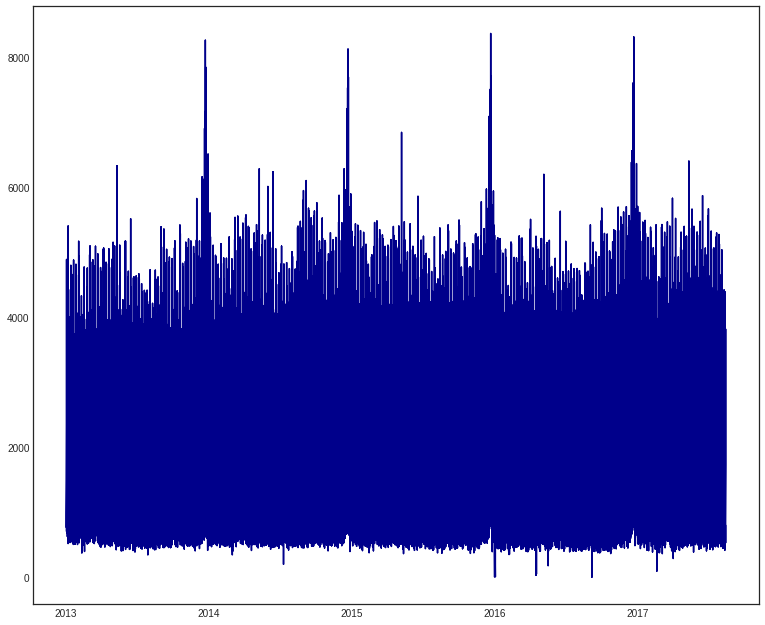

In [ ]:
plt.style.use('seaborn-white')
plt.figure(figsize=(13,11))
plt.plot(transactions.date.values, transactions.transactions.values, color='darkblue')
plt.axvline(x='2015-12-23',color='red',alpha=0.3)
plt.axvline(x='2016-12-23',color='red',alpha=0.3)
plt.axvline(x='2014-12-23',color='red',alpha=0.3)
plt.axvline(x='2013-12-23',color='red',alpha=0.3)
plt.axvline(x='2013-05-12',color='green',alpha=0.2, linestyle= '--')
plt.axvline(x='2015-05-10',color='green',alpha=0.2, linestyle= '--')
plt.axvline(x='2016-05-08',color='green',alpha=0.2, linestyle= '--')
plt.axvline(x='2014-05-11',color='green',alpha=0.2, linestyle= '--')
plt.axvline(x='2017-05-14',color='green',alpha=0.2, linestyle= '--')
plt.ylim(-50, 10000)
plt.title("Distribution of transactions per day from 2013 till 2017")
plt.ylabel('transactions per day', fontsize= 16)
plt.xlabel('Date', fontsize= 16)
plt.show()

**Items Data**

In [ ]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [ ]:
x, y = (list(x) for x in zip(*sorted(zip(items.family.value_counts().index, 
                                         items.family.value_counts().values), 
                                        reverse = False)))
trace2 = go.Bar(
    y=items.family.value_counts().values,
    x=items.family.value_counts().index,
    marker=dict(
        color=items.family.value_counts().values,
        colorscale = 'Portland',
        reversescale = False
    ),
    orientation='v',
)

layout = dict(
    title='Counts of items per family category',
     width = 800, height = 800,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [ ]:
x, y = (list(x) for x in zip(*sorted(zip(items['class'].value_counts().index, 
                                         items['class'].value_counts().values), 
                                        reverse = False)))
trace2 = go.Bar(
    x=items['class'].value_counts().index,
    y=items['class'].value_counts().values,
    marker=dict(
        color=items['class'].value_counts().values,
        colorscale = 'Jet',
        reversescale = True
    ),
    orientation='v',
)

layout = dict(
    title='Number of items attributed to a particular item class',
     width = 800, height = 1400,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [ ]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


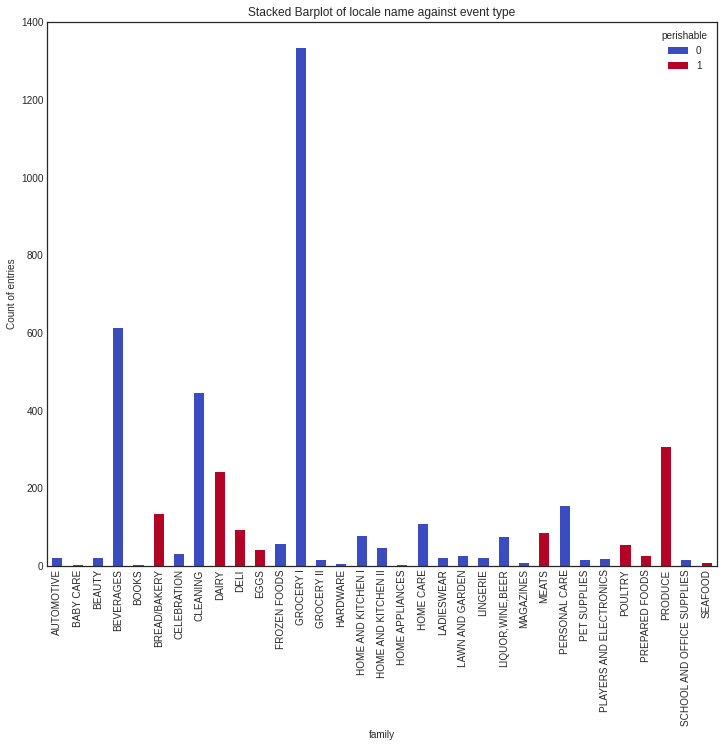

In [ ]:
plt.style.use('seaborn-white')
fam_perishable = items.groupby(['family', 'perishable']).size()
fam_perishable.unstack().plot(kind='bar',stacked=True, colormap= 'coolwarm', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('Count of entries')
plt.show()

**Data Exploration**

In [ ]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


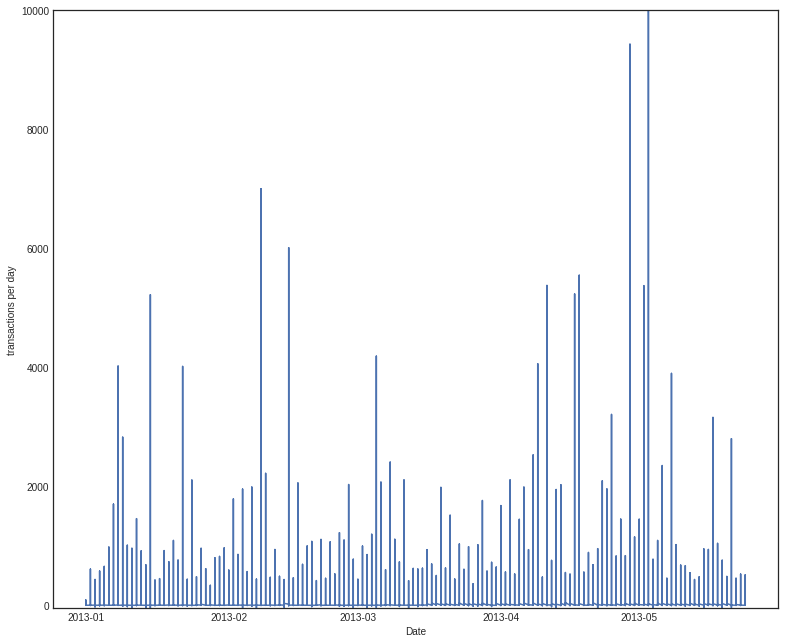

In [ ]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(13,11))
plt.plot(train.date.values, train.unit_sales)
plt.ylim(-50, 10000)
plt.ylabel('transactions per day')
plt.xlabel('Date')
plt.show()